In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [24]:
#create some data
x = np.random.randn(200)


In [25]:
#setup the model
Bayelog_model = pm.Model()
with Bayelog_model:
    #priors for unknown model params
    α = pm.Normal('α', mu =0, sd =1)
    β = pm.Normal('β', mu=0, sd=1)
    #expected value of outcome
    y_est = α + β*x
    #likelihood (sampling distribution) of observations
    y_lik = pm.Normal('y_lik', mu = y_est, sd=1, observed = x)
    
#draw 1000 posterior samples
with Bayelog_model:
    trace = pm.sample(1000)

<ipython-input-25-e204c15b3ea4>:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


<ipython-input-26-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'α'}>],
       [<AxesSubplot:title={'center':'β'}>,
        <AxesSubplot:title={'center':'β'}>]], dtype=object)

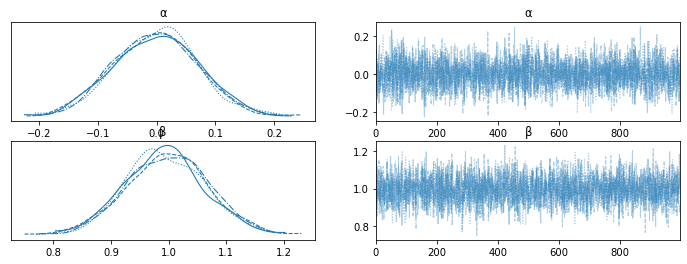

In [26]:
pm.traceplot(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'β'}>]], dtype=object)

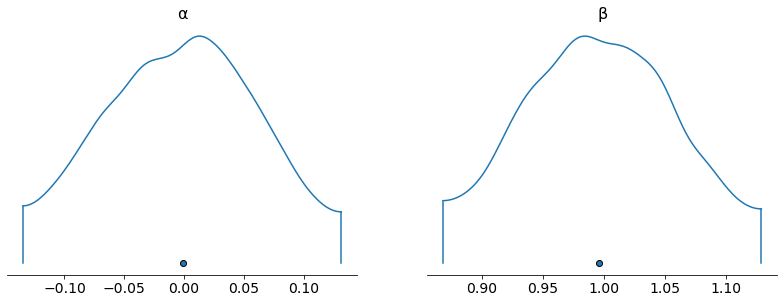

In [27]:
az.plot_density(trace, var_names=['α','β'])

In [21]:
#in order for you to use the below prediction function please update your libr
#!pip install --upgrade --user pymc3

  Using cached pymc3-3.11.5-py3-none-any.whl (872 kB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl (9.8 kB)


In [35]:
#predictions
x_new = np.random.randn(100)
#compute the prediction
with Bayelog_model:
    y_pred = pm.sample_posterior_predictive(trace, samples=2000, var_names=['y_lik'], progressbar= True )

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-6.05942127, -5.81003709, -5.5606529 , -5.31126871, -5.06188453,
        -4.81250034, -4.56311616, -4.31373197, -4.06434778, -3.8149636 ,
        -3.56557941, -3.31619523, -3.06681104, -2.81742686, -2.56804267,
        -2.31865848, -2.0692743 , -1.81989011, -1.57050593, -1.32112174,
        -1.07173755, -0.82235337, -0.57296918, -0.323585  , -0.07420081,
         0.17518337,  0.42456756,  0.67395175,  0.92333593,  1.17272012,
         1.4221043 ,  1.67148849,  1.92087267,  2.17025686,  2.41964105,
         2.66902523,  2.91840942,  3.1677936 ,  3.41717779,  3.66656198,
         3.91594616,  4.16533035,  4.41471453,  4.66409872,  4.9134829 ,
         5.16286709,  5.41225128,  5.66163546,  5.91101965,  6.16040383,
         6.40978802])

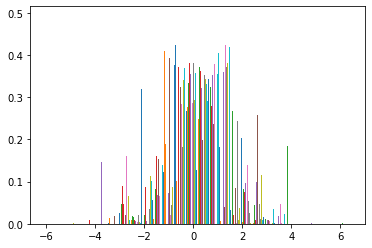

In [37]:
plt.hist(y_pred['y_lik'], bins=50, density=True)


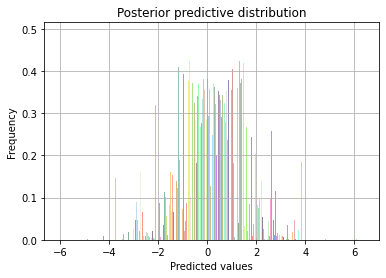

In [41]:
colors = np.random.rand(200,3)
plt.hist(y_pred['y_lik'], bins=50, density=True, color=colors, alpha=0.5)
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Posterior predictive distribution')
plt.grid(True)
plt.show()


In [47]:
#always update your lib in order for these functions to work
!pip install --upgrade --user arviz

     ---------------------------------------- 1.7/1.7 MB 555.0 kB/s eta 0:00:00
     ------------------------------------ 970.0/970.0 kB 534.4 kB/s eta 0:00:00
     -------------------------------------- 42.2/42.2 MB 261.1 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 250.1 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 210.4 kB/s eta 0:00:00
     -------------------------------------- 11.0/11.0 MB 825.5 kB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 1.2 MB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 391.9 kB/s eta 0:00:00
     ------------------------------------ 163.0/163.0 kB 541.5 kB/s eta 0:00:00
     -------------------------------------- 42.7/42.7 kB 690.2 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.1 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.0 which is incompatible.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.24.1 which is incompatible.
uq360 0.2 requires numpy<1.21,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
uq360 0.2 requires tqdm==4.42.

In [46]:
#import arviz as az
az.plot_ppc(trace, var_names=['y_lik'], alpha = 0.5, kind = 'hist', bins = 50)


TypeError: plot_ppc() got an unexpected keyword argument 'bins'

In [44]:
az.plot_posterior_predictive(trace)


AttributeError: module 'arviz' has no attribute 'plot_posterior_predictive'

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'α'}>,
       <AxesSubplot:title={'center':'β'}>], dtype=object)

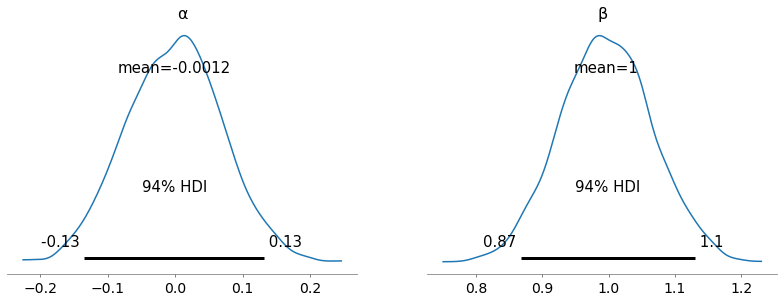

In [45]:
az.plot_posterior(trace)


In [2]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat Jan 21 2023

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.8.0

numpy     : 1.22.1
matplotlib: 3.6.3
arviz     : 0.14.0
pymc3     : 3.11.5

Watermark: 2.3.1

